In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# all values in mm and pa

# = 5#pa 
R_m = np.linspace(1,100,100)
A_m = np.pi*R_m**2

R_c = np.linspace(0.1,50,100)
A_c = np.pi*R_c**2

F_m = np.linspace(1,10,100)*1e3 #Newton
P_open = F_m/A_c
P_close = F_m/A_m


H = A_m-A_c/(A_m*A_c)*F_m

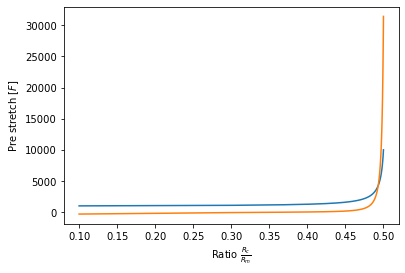

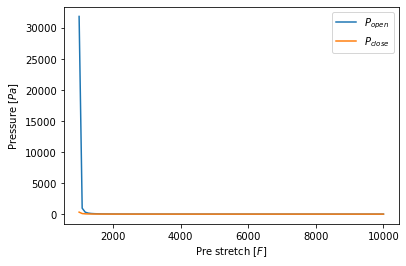

In [32]:
plt.plot(R_c/R_m,F_m)
plt.plot(R_c/R_m,H)
plt.xlabel('Ratio $\\frac{R_c}{R_m}$')
plt.ylabel('Pre stretch [$F$]')
plt.show()

plt.plot(F_m,P_open,label='$P_{open}$')
plt.plot(F_m,P_close,label='$P_{close}$')
plt.ylabel('Pressure [$Pa$]')
plt.xlabel('Pre stretch [$F$]')
plt.legend()
plt.show()


[-0.00439, -0.0193, 0.5853, 0.0601, 0.0358]


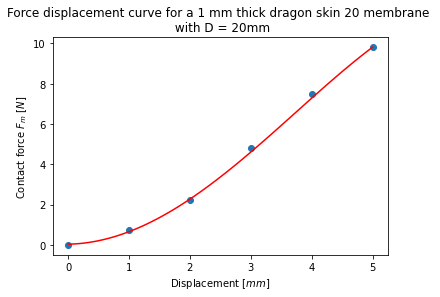

In [50]:
# The following results are from the theisi of Milo Collaris 
t_membrane = 1#mm
D_membrane = 20 # mm

#Values from figure 23
D_c= np.linspace(0,5,6)
F_d = [0, 0.75, 2.25, 4.8, 7.5,9.8]


#Extract coefficients for 4th order fit
#coefficients = np.polyfit(D_c,F_d,4)

#Coefficients from appendix E
coefficients = [-4.39e-3, -1.93e-2,58.53e-2, 6.01e-2, 3.58e-2]

#Create a polynomial curce for this function 
p= np.poly1d(coefficients)

D_c_fit = np.linspace(0,5,100)
F_d_fit = p(D_c_fit)

plt.scatter(D_c,F_d)
plt.plot(D_c_fit,F_d_fit,color='red', label='4th order fit')
plt.xlabel('Displacement [$mm$]')
plt.ylabel('Contact force $F_m$ [$N$]')
plt.title('Force displacement curve for a 1 mm thick dragon skin 30 membrane \n with D = 20mm')
print(coefficients)





In [48]:
np.poly1d?

Init signature: np.poly1d(c_or_r, r=False, variable=None)
Docstring:     
A one-dimensional polynomial class.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

A convenience class, used to encapsulate "natural" operations on
polynomials so that said operations may take on their customary
form in code (see Examples).

Parameters
----------
c_or_r : array_like
    The polynomial's coefficients, in decreasing powers, or if
    the value of the second parameter is True, the polynomial's
    roots (values where the polynomial evaluates to 0).  For example,
    ``poly1d([1, 2, 3])`` returns an object that represents
    :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2, 3], True)`` returns
    one that represents :math:`(x-1)(x-2)(x-3) = x^3 - 6x^2 + 11x -6`.
r : bool, optional
    If True